# 自建portfolio效率前緣

#### 1. 匯入Robo Advisor的資產池

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as scs
import scipy.optimize as sco
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

- 資產池內容(16)
<br/>Stock: VTI, VGK, VPL, VWO, PFF
<br/>Bond：IEI, BWX, AGG, BND
<br/>Currency：FXY, FXF, UDN
<br/>Commodity：IAU, AOA, AOK, USO

In [3]:
data = pd.read_csv("data_adjclose.csv", index_col=0 )
data.index = pd.to_datetime(data.index)

tickers = [i for i in data]
q = len(tickers)

data.head()

,VTI,VGK,VPL,VWO,PFF,IEI,BWX,AGG,BND,FXY,FXF,UDN,IAU,AOA,AOK,USO
Date,,,,,,,,,,,,,,,,
2014-01-02,84.378860,46.217941,51.057976,33.389236,25.745323,108.694878,27.300598,90.548790,67.201050,93.250000,108.667809,26.176607,11.88,37.321964,27.329165,273.839996
2014-01-03,84.361145,46.225983,51.244526,33.347179,25.898182,108.613411,27.233980,90.582863,67.209480,93.220001,108.008736,26.050152,12.01,37.347317,27.380636,270.000000
2014-01-06,84.139259,46.266125,51.032539,33.027584,26.051073,108.785301,27.352930,90.701874,67.268166,93.779999,108.208450,26.137697,12.01,37.296593,27.346323,268.559998
2014-01-07,84.680595,46.579334,51.185162,33.162144,26.002424,108.875786,27.371956,90.744354,67.352066,93.419998,107.549370,26.079332,11.95,37.465664,27.432093,268.640015
2014-01-08,84.742729,46.555244,51.261486,33.103275,26.044107,108.468697,27.272049,90.472290,67.133980,93.250000,107.409569,26.020967,11.89,37.448750,27.397795,265.279999


#### 2. 計算各檔ETF的年化報酬與共變數

In [4]:
returns = np.log(data / data.shift(1))
returns.head()

,VTI,VGK,VPL,VWO,PFF,IEI,BWX,AGG,BND,FXY,FXF,UDN,IAU,AOA,AOK,USO
Date,,,,,,,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.000210,0.000174,0.003647,-0.001260,0.005920,-0.000750,-0.002443,0.000376,0.000125,-0.000322,-0.006083,-0.004843,0.010883,0.000679,0.001882,-0.014122
2014-01-06,-0.002634,0.000868,-0.004145,-0.009630,0.005886,0.001581,0.004358,0.001313,0.000873,0.005989,0.001847,0.003355,0.000000,-0.001359,-0.001254,-0.005348
2014-01-07,0.006413,0.006747,0.002986,0.004066,-0.001869,0.000831,0.000695,0.000468,0.001246,-0.003846,-0.006109,-0.002235,-0.005008,0.004523,0.003132,0.000298
2014-01-08,0.000733,-0.000517,0.001490,-0.001777,0.001602,-0.003746,-0.003657,-0.003003,-0.003243,-0.001821,-0.001301,-0.002240,-0.005034,-0.000452,-0.001251,-0.012586


In [5]:
returns.cov()*252

,VTI,VGK,VPL,VWO,PFF,IEI,BWX,AGG,BND,FXY,FXF,UDN,IAU,AOA,AOK,USO
VTI,0.017469,0.016119,0.015013,0.018118,0.003125,-0.001397,-0.000551,-0.000882,-0.001001,-0.004724,-0.002127,-0.000542,-0.002571,0.013300,0.004605,0.014422
VGK,0.016119,0.024796,0.017545,0.022054,0.003435,-0.001302,0.002145,-0.000823,-0.000963,-0.003800,0.001182,0.003254,-0.001137,0.014666,0.005285,0.018679
VPL,0.015013,0.017545,0.020117,0.021108,0.003189,-0.001044,0.000654,-0.000541,-0.000673,-0.003805,-0.000746,0.000617,-0.001165,0.013210,0.004843,0.015469
VWO,0.018118,0.022054,0.021108,0.033425,0.004016,-0.001113,0.001992,-0.000438,-0.000575,-0.003461,-0.000202,0.001817,0.000446,0.016333,0.006107,0.022914
PFF,0.003125,0.003435,0.003189,0.004016,0.002455,0.000038,0.000338,0.000244,0.000219,-0.000503,-0.000293,0.000009,0.000098,0.002696,0.001157,0.003724
IEI,-0.001397,-0.001302,-0.001044,-0.001113,0.000038,0.000824,0.001028,0.000780,0.000791,0.001483,0.000895,0.000568,0.001601,-0.000923,0.000085,-0.001556
BWX,-0.000551,0.002145,0.000654,0.001992,0.000338,0.001028,0.004532,0.001056,0.001055,0.004017,0.003810,0.004090,0.004637,0.000472,0.000816,0.001959
AGG,-0.000882,-0.000823,-0.000541,-0.000438,0.000244,0.000780,0.001056,0.000907,0.000875,0.001315,0.000747,0.000491,0.001510,-0.000490,0.000302,-0.001227
BND,-0.001001,-0.000963,-0.000673,-0.000575,0.000219,0.000791,0.001055,0.000875,0.000922,0.001393,0.000749,0.000470,0.001538,-0.000595,0.000272,-0.001266
FXY,-0.004724,-0.003800,-0.003805,-0.003461,-0.000503,0.001483,0.004017,0.001315,0.001393,0.007929,0.003847,0.003365,0.006149,-0.003245,-0.000509,-0.002519


In [6]:
annual_returns = returns.mean()*252

VTI    0.105254
VGK    0.027065
VPL    0.044355
VWO    0.042217
PFF    0.055167
IEI    0.019224
BWX    0.000262
AGG    0.028510
BND    0.029289
FXY   -0.016286
FXF   -0.033042
UDN   -0.047334
IAU    0.006386
AOA    0.067684
AOK    0.039870
USO   -0.178054
dtype: float64

#### 3. 隨機分配資產初始權重

In [7]:
weights = np.random.random(q)
weights /= np.sum(weights)
weights

array([0.0576963 , 0.06495128, 0.01838536, 0.06510661, 0.11522546,
       0.03757418, 0.0060915 , 0.07518202, 0.08844177, 0.09932068,
       0.06799561, 0.06049589, 0.0925508 , 0.02547012, 0.01330345,
       0.11220898])

#### 4. 計算預期組合年化Return、Var、std

In [8]:
np.sum(returns.mean()*weights)*252

-0.0006525565976051902

In [9]:
np.dot(weights.T, np.dot(returns.cov()*252, weights))

0.004274569554422698

In [10]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))

0.06538019237064616

#### 5. 模擬隨機組合（略）

#### 6. 投資組合優化_1（Max Sharpe）

In [11]:
def statistics(weights):
    weights = np.array(weights)
    port_return = np.sum(returns.mean()*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([port_return, port_variance, port_return/port_variance])

In [12]:
# 最小化Sharpe的負值
def min_sharpe(weights):
    return -statistics(weights)[2]

# 限制權重總和為1
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# 限制權重範圍在0和1之間
bnds = tuple((0,1) for x in range(q))
# 優化起始參數值(x0)
opts = sco.minimize(min_sharpe, q*[1./q,], method='SLSQP', bounds=bnds, constraints=cons)

opts

     fun: -1.5207719492819014
     jac: array([-9.26852226e-06,  2.62638551e+00,  2.04987259e+00,  3.23204985e+00,
       -3.40789557e-05,  3.27215344e-02,  1.32196383e+00,  4.42005694e-03,
        1.28746033e-05,  1.10631436e+00,  1.52033626e+00,  2.12831402e+00,
        1.18810402e+00,  7.72802085e-01,  3.77308384e-01,  9.18282454e+00])
 message: 'Optimization terminated successfully.'
    nfev: 219
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([1.12221610e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.20295179e-01, 1.72856114e-14, 8.57796997e-15, 2.09602565e-13,
       6.67483211e-01, 1.48279002e-14, 9.59501366e-15, 4.64363566e-15,
       1.20638056e-14, 0.00000000e+00, 9.91952691e-15, 0.00000000e+00])

In [13]:
# 最優組合的權重向量
opts['x'].round(3)

array([0.112, 0.   , 0.   , 0.   , 0.22 , 0.   , 0.   , 0.   , 0.667,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

In [14]:
#Tangency portfolio 的預期收益率、預期波動率、最大Sharpe
statistics(opts['x'].round(3))

array([0.04346134, 0.02857848, 1.52077167])

#### 7. 投資組合優化_2（Minimum-Variance portfolio)

In [15]:
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, q*[1./q,], method='SLSQP',bounds=bnds, constraints=cons)

optv

     fun: 0.02362078666199771
     jac: array([0.0236491 , 0.02934392, 0.02976677, 0.0432169 , 0.02366963,
       0.02360686, 0.03897756, 0.02471685, 0.02456166, 0.03566042,
       0.02701881, 0.02370187, 0.05053752, 0.02563529, 0.02372912,
       0.02364175])
 message: 'Optimization terminated successfully.'
    nfev: 540
     nit: 30
    njev: 30
  status: 0
 success: True
       x: array([7.03705273e-02, 0.00000000e+00, 5.25838054e-18, 0.00000000e+00,
       1.21073105e-01, 7.73541785e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.19839641e-18, 2.84161415e-02,
       0.00000000e+00, 0.00000000e+00, 4.87591935e-03, 1.72252186e-03])

In [20]:
# MVP 的預期收益率、預期波動率、最大Sharpe
statistics(optv['x'])

array([0.02749959, 0.02362079, 1.16421131])

#### 8. 組合的有效前緣

In [17]:
def min_variance(weights):
    return statistics(weights)[1]

# 在不同目標收益率(target_returns)水平循環時，最小化的約束條件會變化
target_returns = np.linspace(statistics(optv['x'])[0], annual_returns.max(), 50)
target_variance = []
#cnt = 0

for tar in target_returns:
    #cnt+=1
    cons = ({'type':'eq', 'fun': lambda x: statistics(x)[0]-tar},
           {'type':'eq', 'fun': lambda x: np.sum(x) - 1})
    res = sco.minimize(min_variance, q*[1./q,], method='SLSQP', bounds=bnds, constraints=cons)
    target_variance.append(res['fun'])
    #print(cnt)

target_variance = np.array(target_variance)

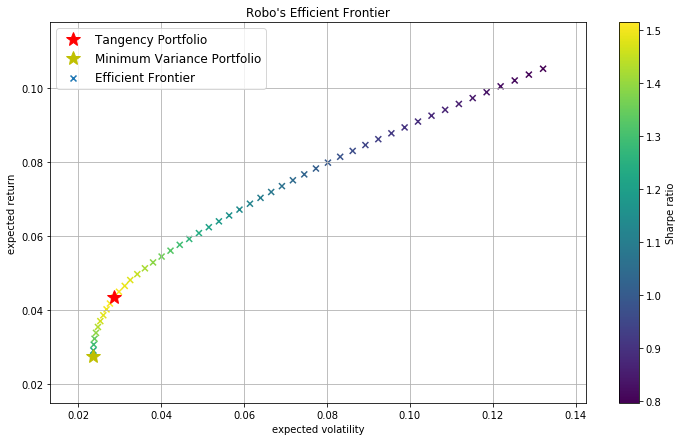

In [23]:
plt.figure(figsize=(12,7))
#圈圈：模擬點
#plt.scatter(port_variance, port_returns, c=port_returns/port_variance, marker='o')
# 叉號：有效前緣
plt.scatter(target_variance, target_returns, c=target_returns/target_variance, marker='x', label='Efficient Frontier')
#紅星：最高Sharpe
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0],'r*', markersize=15.0, label='Tangency Portfolio')
#黃星：MVP
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0],'y*', markersize=15.0, label='Minimum Variance Portfolio')

plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.legend(loc='upper left', fontsize=12)
plt.colorbar(label='Sharpe ratio')
plt.title("Robo's Efficient Frontier")
plt.show()